Problem Statement:
You are the data scientist at a telecom company named "Neo" whose customers are churning out to its competitors. You have to analyze the data of your company and find insights and stop your customers from churning out to other telecom companies.
Tasks To Be Performed:
1. Data Manipulation:
• Extract the 5th column and store it in 'customer_5'
• Extract the 15th column and store it in 'customer_15'
• Extract all the male senior citizens whose payment method is electronic check and store the result in 'senior_male _electronic'
• Extract all those customers whose tenure is greater than 70 months or their monthly charges is more than $100 and store the result in
'customer_total_tenure'Extract all the customers whose contract is of two years, payment method is mailed check and the value of churn is 'Yes' and store the result in
'two_mail_yes'
• Extract 333 random records from the customer_churndataframe and store the result in 'customer_333'
• Get the count of different levels from the 'Churn' column
2. Data Visualization:
• Build a bar-plot for the 'InternetService' column:
a. Set x-axis label to 'Categories of Internet Service'
b. Set y-axis label to 'Count of Categories'
c. Set the title of plot to be 'Distribution of Internet Service'
d. Set the color of the bars to be 'orange'
• Build a histogram for the 'tenure' column:
a. Set the number of bins to be 30
b. Set the color of the bins to be 'green'
c. Assign the title 'Distribution of tenure'
Build a scatter-plot between 'MonthlyCharges'
and
L DA
'tenure'
. Мар
'MonthlyCharges' to the y-axis and 'tenure' to the 'x-axis':
a. Assign the points a color of 'brown'
b. Set the x-axis label to 'Tenure of customer'
c. Set the y-axis label to 'Monthly Charges of customer'
d. Set the title to 'Tenure vs Monthly Charges'
e. Build a box-plot between 'tenure' & 'Contract'. Map 'tenure' on the y-axis &
f. 'Contract' on the x-axis.
3. Linear Regression:
• Build a simple linear model where dependent variable is 'MonthlyCharges' and independent variable is 'tenure':
a. Divide the dataset into train and test sets in 70:30 ratio.
b. Build the model on train set and predict the values on test set
c. After predicting the values, find the root mean square error
d. Find out the error in prediction & store the result in 'error'
e. Find the root mean square error
4. Logistic Regression:
• Build a simple logistic regression model where dependent variable is
'Churn' and independent variable is 'MonthlyCharges':
a. Divide the dataset in 65:35 ratio
b. Build the model on train set and predict the values on test set
c. Build the confusion matrix and get the accuracy score
d. Build a multiple logistic regression model where dependent variable is 'Churn' and independent variables are
'tenure'
and
'MonthlyCharges'
e. Divide the dataset in 80:20 ratio
f. Build the model on train set and predict the values on test set
g. Build the confusion matrix and get the accuracy score
5. Decision Tree:
• Build a decision tree model where dependent variable is 'Churn' and independent variable is 'tenure':
a. Divide the dataset in 80:20 ratio
b. Build the model on train set and predict the values on test set
c. Build the confusion matrix and calculate the accuracy
6. Random Forest:
• Build a Random Forest model where dependent variable is 'Churn' and independent variables are 'tenure' and 'MonthlyCharges':
a. Divide the dataset in 70:30 ratio
b. Build the model on train set and predict the values on test set
c. Build the confusion matrix and calculate the accuracy

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [64]:
# Load dataset
file_path = "/content/customer_churn.csv"
df = pd.read_csv(file_path)


In [65]:
# Data Manipulation
customer_5 = df.iloc[:, 4]
customer_15 = df.iloc[:, 14]


In [66]:
senior_male_electronic = df[(df['gender'] == 'Male') &
                            (df['SeniorCitizen'] == 1) &
                            (df['PaymentMethod'] == 'Electronic check')]


In [67]:
customer_total_tenure = df[(df['tenure'] > 70) | (df['MonthlyCharges'] > 100)]


In [68]:
two_mail_yes = df[(df['Contract'] == 'Two year') &
                  (df['PaymentMethod'] == 'Mailed check') &
                  (df['Churn'] == 'Yes')]

In [69]:
customer_333 = df.sample(n=333, random_state=42)

In [70]:
churn_counts = df['Churn'].value_counts()

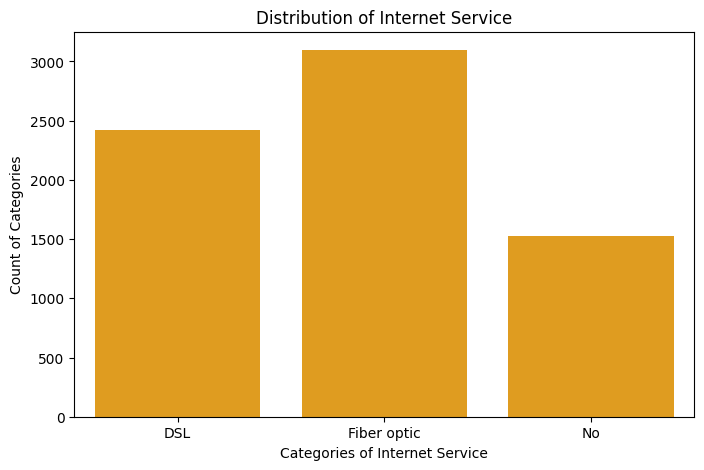

In [71]:
# Data Visualization
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='InternetService', color='orange')
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of Categories')
plt.title('Distribution of Internet Service')
plt.show()

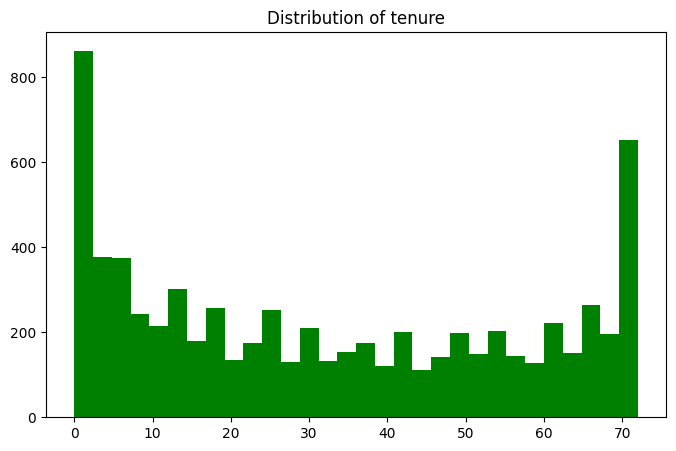

In [72]:
plt.figure(figsize=(8,5))
plt.hist(df['tenure'], bins=30, color='green')
plt.title('Distribution of tenure')
plt.show()


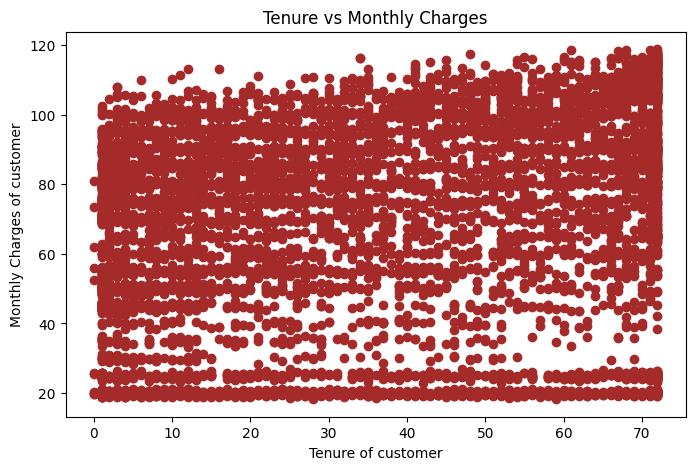

In [73]:
plt.figure(figsize=(8,5))
plt.scatter(df['tenure'], df['MonthlyCharges'], color='brown')
plt.xlabel('Tenure of customer')
plt.ylabel('Monthly Charges of customer')
plt.title('Tenure vs Monthly Charges')
plt.show()

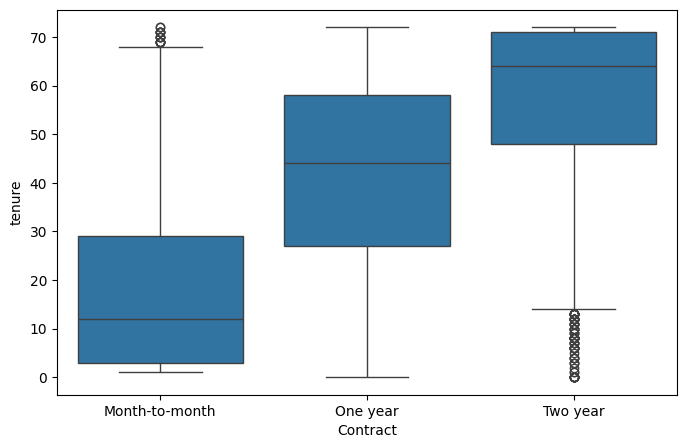

In [74]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Contract', y='tenure', data=df)
plt.show()

In [75]:
# Linear Regression
X = df[['tenure']]
y = df['MonthlyCharges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

error = y_test - y_pred
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


In [76]:
print("Intercept:", lr.intercept_)
print("Coefficient:", lr.coef_[0])


Intercept: 54.79837462739951
Coefficient: 0.3082154776200297


In [77]:
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 29.07936015646814


In [78]:
# Logistic Regression
X = df[['MonthlyCharges']]
y = (df['Churn'] == 'Yes').astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)


In [79]:
print("Confusion Matrix:")
print(conf_matrix)
print("Accuracy:", accuracy)

Confusion Matrix:
[[1797    0]
 [ 669    0]]
Accuracy: 0.7287104622871047


In [80]:
# Multiple Logistic Regression
X = df[['tenure', 'MonthlyCharges']]
y = (df['Churn'] == 'Yes').astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg_multi = LogisticRegression()
log_reg_multi.fit(X_train, y_train)
y_pred = log_reg_multi.predict(X_test)

conf_matrix_multi = confusion_matrix(y_test, y_pred)
accuracy_multi = accuracy_score(y_test, y_pred)


In [81]:
print("Confusion Matrix (Multiple Logistic Regression):")
print(conf_matrix_multi)
print("Accuracy (Multiple Logistic Regression):", accuracy_multi)

Confusion Matrix (Multiple Logistic Regression):
[[944  92]
 [193 180]]
Accuracy (Multiple Logistic Regression): 0.7977288857345636


In [83]:
# Decision Tree
X = df[['tenure']]
y = (df['Churn'] == 'Yes').astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

dt_conf_matrix = confusion_matrix(y_test, y_pred)
dt_accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix (Decision Tree):")
print(dt_conf_matrix)
print("Accuracy (Decision Tree):", dt_accuracy)


Confusion Matrix (Decision Tree):
[[951  85]
 [257 116]]
Accuracy (Decision Tree): 0.7572746628814763


In [85]:
# Random Forest
X = df[['tenure', 'MonthlyCharges']]
y = (df['Churn'] == 'Yes').astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

rf_conf_matrix = confusion_matrix(y_test, y_pred)
rf_accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix (Random Forest):")
print(rf_conf_matrix)
print("Accuracy (Random Forest):", rf_accuracy)

Confusion Matrix (Random Forest):
[[1341  198]
 [ 308  266]]
Accuracy (Random Forest): 0.7605300520586843
